In [256]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
import healpy as hp
sys.path.append('../')
import constants_noh as constants
import units
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 15
rcParams['text.usetex'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


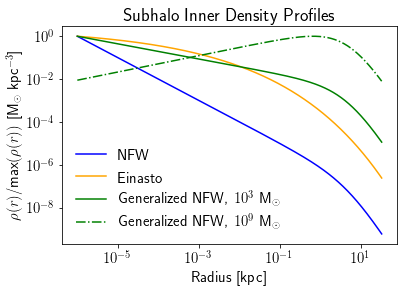

In [238]:
r_s = 5
r_test = np.logspace(-6,1.5,1000)

def nfw(r, m):
    rho0 = m / quad( lambda x: ( x/r_s*(1+x/r_s)**2 )**(-1) * x**2 * 4*np.pi, 0, 500 )[0]
    return rho0 / ( r/r_s*(1+r/r_s)**2 )
def ein(r, m):
    rho0 = m / quad( lambda x: np.exp( -2/0.17 * ( (x/r_s)**0.17 - 1 ) )* x**2 * 4*np.pi, 0, 500 )[0]
    return rho0 * np.exp( -2/0.17 * ( (r/r_s)**0.17 - 1 ) )

def gennfw(r, m):
    alpha = -0.123 * np.log10( m *1e6 ) + 1.461
    rho0 = m / quad( lambda x: ( (x/r_s)**(alpha)*(1+x/r_s)**(3-alpha) )**(-1) * 4*np.pi*x**2, 0, 500 )[0]
    return rho0 / ( (r/r_s)**(alpha)*(1+r/r_s)**(3-alpha) )

plt.plot( r_test, nfw(r_test, 1e3)/max(nfw(r_test, 1e3)), label="NFW", c="blue" )
plt.plot( r_test, ein(r_test, 1e3)/max(ein(r_test, 1e3)), label="Einasto", c="orange" )
plt.plot( r_test, gennfw(r_test, 1e3)/max(gennfw(r_test, 1e3)), label="Generalized NFW, $10^3$ M$_{\odot}$", c="green" )
plt.plot( r_test, gennfw(r_test, 1e9)/max(gennfw(r_test, 1e9)), label="Generalized NFW, $10^9$ M$_{\odot}$", ls="-.", c="green" )
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Radius [kpc]")
plt.ylabel("$\\rho(r)/\\textup{max}(\\rho(r))$ [M$_{\odot}$ kpc$^{-3}$]")
plt.title("Subhalo Inner Density Profiles")
plt.legend(frameon=False)
plt.legend(frameon=False)

Text(0.5,1,'Concentration-Mass Relations')

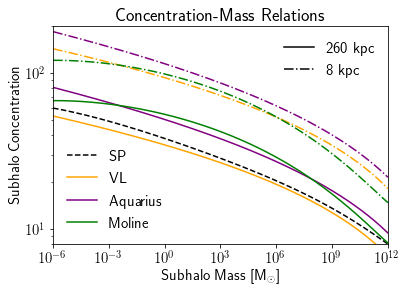

In [195]:
def SP(m):
    c_arr = [37.5153, -1.5093, 1.636 * 10**(-2), 3.66 * 10**(-4), -2.89237 * 10**(-5), 5.32 * 10**(-7)]
    c_arr.reverse()
    c200_val = np.polyval(c_arr, np.log(m*0.7))
    return c200_val 

def VL(m, r):
    return (r/260)**(-0.286) * (119.75 * m**(-0.012) - 85.16 * m**(-0.0026))

def Aq(m, r):
    return (r/260)**(-0.237) * (232.15 * m**(-0.0146) - 181.74 * m**(-0.008))

def Mol(m, r):
    x = r/260
    a_arr = [-0.195, 0.089, 0.089]
    
    c_arr = [ -0.195, 0.089, 0.089 ]
    c_200 = 0
    for i in range(1,4):
        c_200 += (c_arr[i - 1] * np.log10(1.e-8 * m * 0.71))**i
    c_200 = 19.9 * (1. + c_200) * (1. - 0.54 * np.log10(r / 260));
    return c_200

    #a_arr.reverse()
    #return 19.9 * ( 1 - 0.195*np.log10(m*.71*1e-8) + (0.089*np.log10(m*.7*1e-8))**2 + (0.089*(np.log10(m*.7*1e-8)))**3 ) * (1 - 0.54*np.log10(x) )
    #return 19.9 * ( 1 + np.polyval(a_arr, np.log10(m*.7/1e8)) )# * (1 - 0.54*np.log10(x) )

m_test_arr = np.logspace(-6,12, 1000)
plt.plot(m_test_arr, SP(m_test_arr), label="SP", ls='--', c="black")
plt.plot(m_test_arr, VL(m_test_arr, 260), label="VL", c="orange")
plt.plot(m_test_arr, Aq(m_test_arr, 260), label="Aquarius", c="purple")
plt.plot(m_test_arr, Mol(m_test_arr, 260), label="Moline", c="green")
plt.plot(m_test_arr, VL(m_test_arr, 8), ls="-.", c="orange")
plt.plot(m_test_arr, Aq(m_test_arr, 8), ls="-.", c="purple")
plt.plot(m_test_arr, Mol(m_test_arr, 8), ls="-.", c="green")
l1 = plt.plot([-1], [-1], c="black")
l2 = plt.plot([-1], [-1], ls="-.", c="black")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-6, 1e12)
plt.ylim(8, 200)
plt.gca().add_artist(plt.legend([l[0] for l in [l1, l2]], ["260 kpc", "8 kpc"], frameon=False))
plt.legend(frameon=False)
plt.xlabel("Subhalo Mass [M$_{\odot}$]")
plt.ylabel("Subhalo Concentration")
plt.title("Concentration-Mass Relations")

Text(0.5,1,'Subhalo Mass Distributions')

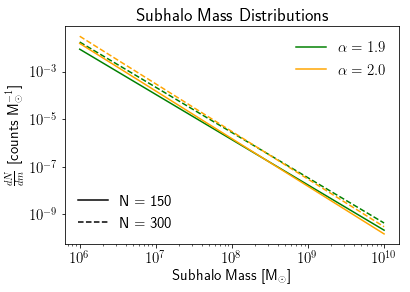

In [246]:
m_test_arr = np.logspace(6,10, 1000)
plt.plot(m_test_arr, 150 * m_test_arr**(-1.9) / ( -1/.9 *( (10**10)**(-.9) - (10**8)**(-.9)) ), label="$\\alpha=1.9$", c="green" )
plt.plot(m_test_arr, 300 * m_test_arr**(-1.9) / ( -1/.9 *( (10**10)**(-.9) - (10**8)**(-.9)) ), ls="--", c="green" )
plt.plot(m_test_arr, 150 * m_test_arr**(-2.0) / ( -1 *( (10**10)**(-1) - (10**8)**(-1)) ), label="$\\alpha=2.0$", c="orange" )
plt.plot(m_test_arr, 300 * m_test_arr**(-2.0) / ( -1 *( (10**10)**(-1) - (10**8)**(-1)) ), ls="--", c="orange" )

plt.yscale("log")
plt.xscale("log")
plt.legend(frameon=False)
l1 = plt.plot([-1], [-1], c="black")
l2 = plt.plot([-1], [-1], ls="--", c="black")
plt.gca().add_artist(plt.legend([l[0] for l in [l1, l2]], ["N = 150", "N = 300"], frameon=False, loc=3))
plt.legend(frameon=False)
plt.xlabel("Subhalo Mass [M$_{\odot}$]")
plt.ylabel("$\\frac{dN}{dm}$ [counts M$_{\odot}^{-1}$]")
plt.title("Subhalo Mass Distributions")

Text(0.5,1,'Subhalo Density Distributions')

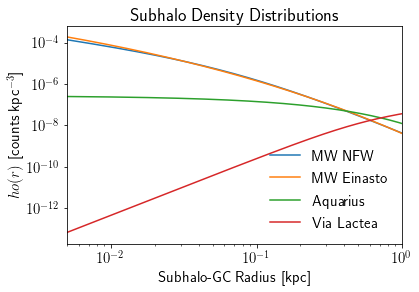

In [169]:
r_test_arr = np.logspace(0,np.log10(2000), 1000)
N = 1

rho_mwnfw = N / quad( lambda x: ( x/17*(1+x/17)**2 )**(-1) * x**2 * 4*np.pi, 0, 213.5 )[0]
def mwnfw(r):
    return rho_mwnfw / ( r/17*(1+r/17)**2 )

rho_mwein = N / quad( lambda x: np.exp( -2/0.17 * ( (x/17)**0.17 - 1 ) )* x**2 * 4*np.pi, 0, 213.5 )[0]
def mwein(r):
    return rho_mwein * np.exp( -2/0.17 * ( (r/17)**0.17 - 1 ) )

rho_mwein_ab = N / quad( lambda x: np.exp( -2/0.17 * ( (x/17)**0.17 - 1 ) )* x**3 * 4*np.pi, 0, 213.5 )[0]
def mwein_ab(r):
    return rho_mwein_ab * np.exp( -2/0.17 * ( (r/17)**0.17 - 1 ) ) * r
    
rho_eaq = N / quad( lambda x: np.exp( -2/0.678* ( (x/199)**0.678 - 1 ) )* x**2 * 4*np.pi, 0, 213.5 )[0]
def eaq(r):
    return rho_eaq * np.exp( -2/0.678 * ( (r/199)**0.678 - 1 ) )

N0 = N / quad( lambda y: 4*np.pi*(1+0.244*12)*(y/213.5)**(2.75)/(1+0.244*12*(y/213.5)**(2))*y**2, 0, 213.5)[0]
def vl(r):
    x = r/213.5
    return N0*(1+0.244*12)*x**(2.75)/(1+0.244*12*x**(2))

def vl2(r):
    x = r/213.5
    return 12*x**3/(1+11*x**2)

plt.plot(r_test_arr/213.5, mwnfw(r_test_arr), label="MW NFW")
plt.plot(r_test_arr/213.5, mwein(r_test_arr), label="MW Einasto")
plt.plot(r_test_arr/213.5, eaq(r_test_arr), label="Aquarius")
plt.plot(r_test_arr/213.5, vl(r_test_arr), label="Via Lactea")
plt.xlim(5e-3, 1)
plt.yscale("log")
plt.xscale("log")
plt.legend(frameon=False)
plt.xlabel("Subhalo-GC Radius [kpc]")
plt.ylabel("$\rho(r)$ [counts kpc$^{-3}$]")
plt.title("Subhalo Density Distributions")

In [107]:
# mwnfw_cum = []
# for r in r_test_arr:
#     mwnfw_cum.append(quad(lambda r: 4*np.pi*r**2 * mwnfw(r), 0, r)[0])
    
mwein_cum = []
for r in r_test_arr:
    mwein_cum.append(quad(lambda r: 4*np.pi*r**2 * mwein(r), 0, r)[0])

mwein_ab_cum = []
for r in r_test_arr:
    mwein_ab_cum.append(quad(lambda r: 4*np.pi*r**2 * mwein_ab(r), 0, r)[0])
    
# eaq_cum = []
# for r in r_test_arr:
#     eaq_cum.append(quad(lambda r: 4*np.pi*r**2 * eaq(r), 0, r)[0])
    
# vl_cum = []
# for r in r_test_arr:
#     vl_cum.append(quad(lambda r: 4*np.pi*r**2 * vl(r), 0, r)[0])

# vl2_cum = []
# for r in r_test_arr:
#     vl2_cum.append(vl2(r))

(0.0001, 7)

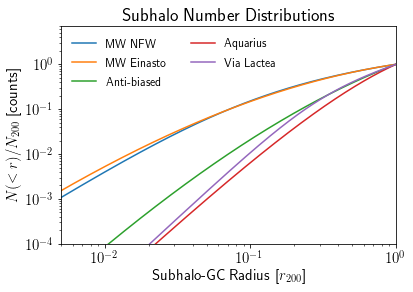

In [247]:
plt.plot(r_test_arr/213.5, mwnfw_cum, label="MW NFW")
plt.plot(r_test_arr/213.5, mwein_cum, label="MW Einasto")
plt.plot(r_test_arr/213.5, mwein_ab_cum, label="Anti-biased")
plt.plot(r_test_arr/213.5, eaq_cum, label="Aquarius")
plt.plot(r_test_arr/213.5, vl2_cum, label="Via Lactea")
plt.yscale("log")
plt.xscale("log")
plt.legend(frameon=False, ncol=2, fontsize=12, loc=2)
plt.xlabel("Subhalo-GC Radius [$r_{200}$]")
plt.ylabel("$N(<r)/N_{200}$ [counts]")
plt.title("Subhalo Number Distributions")
plt.xlim(5e-3, 1)
plt.ylim(1e-4, 7)

/tigress/somalwar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


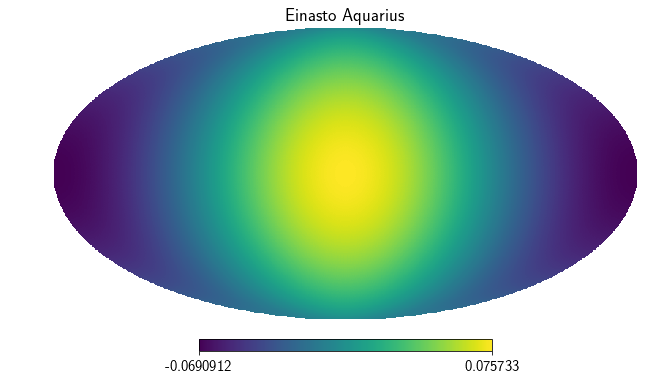

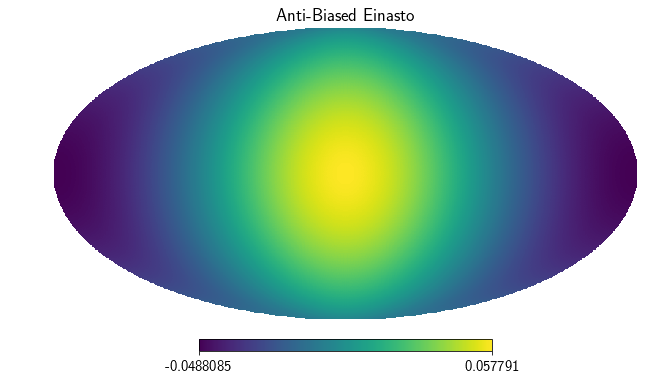

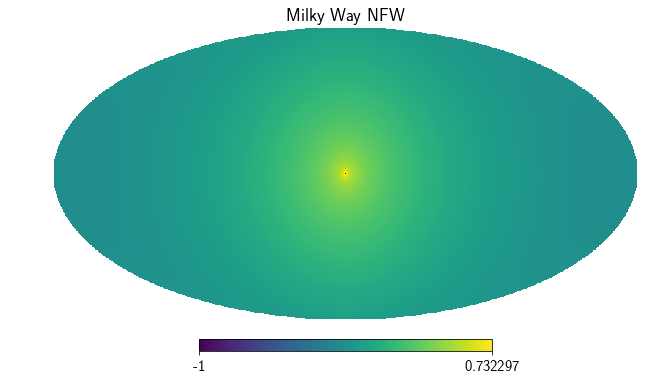

In [269]:
nside = 128
npix = hp.nside2npix(nside)
Omegapix = hp.nside2pixarea(nside)
def r_galactocentric(l, psi_deg):
    return np.sqrt(constants.r0**2. + l**2. - 2.*constants.r0*l*np.cos(np.radians(psi_deg)))

def Einasto_integral_LOS(model, psi_deg):
    return quad(lambda l: l**2 * model(r_galactocentric(l, psi_deg)), 0., 2000.)[0]

def make_Einasto_template(model):
    psi_deg = np.arange(0., 180.5, 0.5)
    integrand_Ein = np.vectorize(Einasto_integral_LOS)(model, psi_deg)
    Einasto_Int = interp1d(psi_deg, integrand_Ein*Omegapix)
    psi_deg_pixels = np.array([np.degrees(np.arccos(np.dot([1.0, 0.0, 0.0], hp.pix2vec(nside, pix)))) for pix in range(npix)])                                                                 
    return Einasto_Int(psi_deg_pixels)

template = np.nan_to_num(make_Einasto_template(eaq))
template = template/np.mean(template) - 1
sum1 = np.sum(template)
hp.mollview(template, title="Einasto Aquarius")

template = np.nan_to_num(make_Einasto_template(mwein_ab))
template = template/np.mean(template) - 1
sum1 = np.sum(template)
hp.mollview(template, title="Anti-Biased Einasto")

template = np.nan_to_num(make_Einasto_template(mwnfw))
template = template/np.mean(template) - 1
sum1 = np.sum(template)
hp.mollview(template, title="Milky Way NFW")